In [1]:
import yaml
import pickle
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import matplotlib as mpl
from astropy import constants, units

from scripts import *

plt.rcParams['font.size'] = 16
path = '/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc'
path = '/Users/arcticfox/Documents/disks'

## MIST table

In [2]:
model_path = '/Users/arcticfox/Documents/disks/MIST_models'
model_fns = np.sort([os.path.join(model_path, i) for i in os.listdir(model_path)])

In [3]:
for i in range(len(model_fns)):
    tab = Table.read(model_fns[i], format='ascii')
    row = tab[tab['star_age']>=10**6][0]
    print(row['star_mass'], 10**row['log_Teff'], 10**row['log_L'])

0.4999994915955536 3784.102291324299 0.6370549834201253
0.9999987702419169 4468.185741682282 1.9869964537995704
1.499997997939447 4824.931634083035 3.859165544101311
1.999997190943879 5051.6613073550525 6.295990228299728
2.4999963426985228 5236.997763724676 9.993338087930589
2.9999953788725024 5444.943181815054 17.77829061938326


In [4]:
steps = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

## RADMC model call

bigdisk
saved star spectrum
0.1 50.0


/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/save_model_params_herbig.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'T_star' in star_keys:
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/save_model_params_herbig.py:52: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'L_star' in star_keys:
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/save_model_params_herbig.py:60: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'L_uv_star' in star_keys:
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/save_model_params_herbig.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'R_s

Saved radmc setup files in /Users/arcticfox/Documents/disks/models/bigdisk
completed thermal mc
Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat
Saved gas disk data


/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:49: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("BuPu").copy()
  dcmap.set_under('w')
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:50: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("BuPu").copy()
  dcmap.set_over(dcmap(1.0))
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:53: MatplotlibDeprecationWarning: You are modifying the state of a globa

plotted bigdisk summary figure


/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:128: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("BuPu").copy()
  dcmap.set_under('w')
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:129: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("BuPu").copy()
  dcmap.set_over(dcmap(1.0))
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:132: MatplotlibDeprecationWarning: You are modifying the state of a gl

plotted bigdisk summary figure


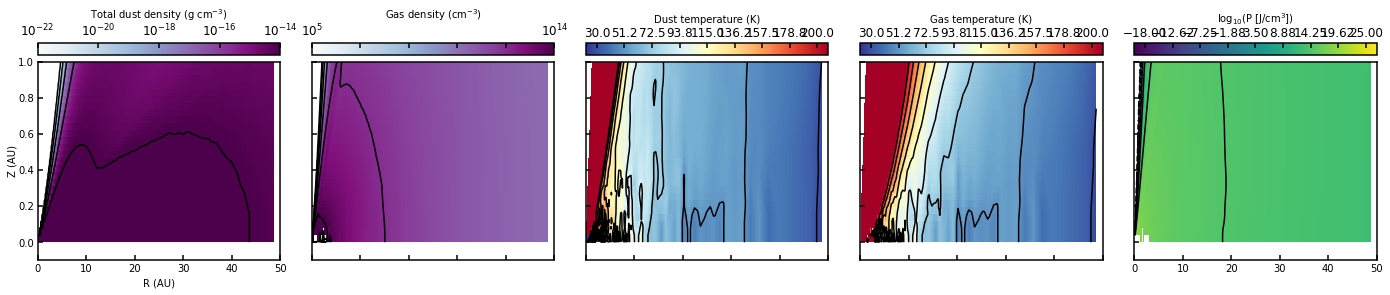

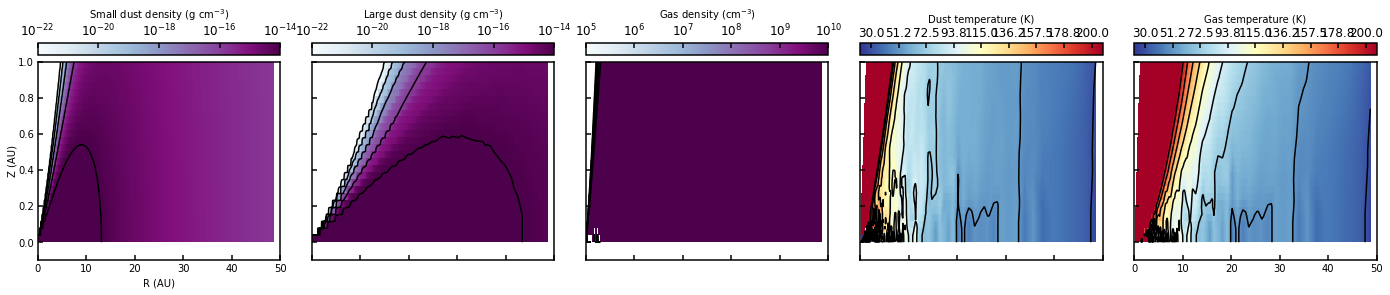

In [5]:
norm = setup(PATH=path, models=['bigdisk'], 
             uv=True, run=True,
             disk_params={'r_in':0.1, 'r_out':50.0, 'r_peb':50.0, 'r_snow':0},
             grid_params={'ntheta':100, 
                          'nr':120, 
                          'n_in':0.05},
             disk_type='herbig')#, 
            # nphot=10**7)
            ## nr = 100; ntheta=96

bigdisk100
saved star spectrum
0.1 50.0
Saved radmc setup files in /Users/arcticfox/Documents/disks/models/bigdisk100
completed thermal mc
Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat
Saved gas disk data
plotted bigdisk100 summary figure
plotted bigdisk100 summary figure


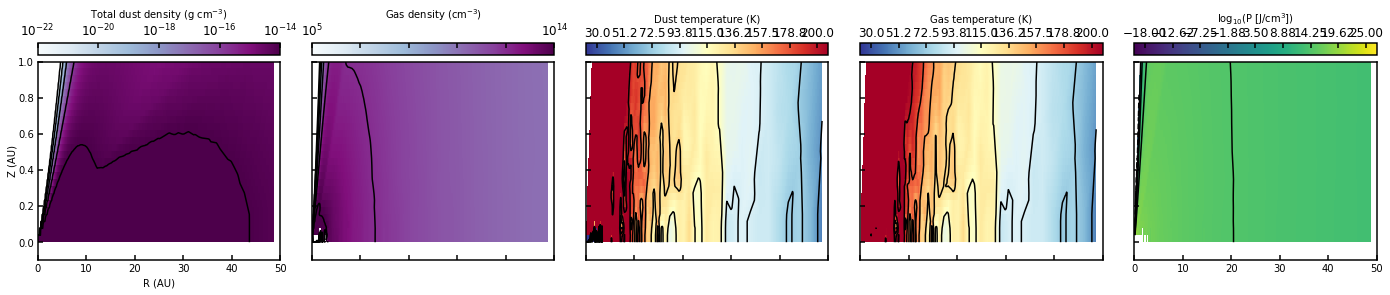

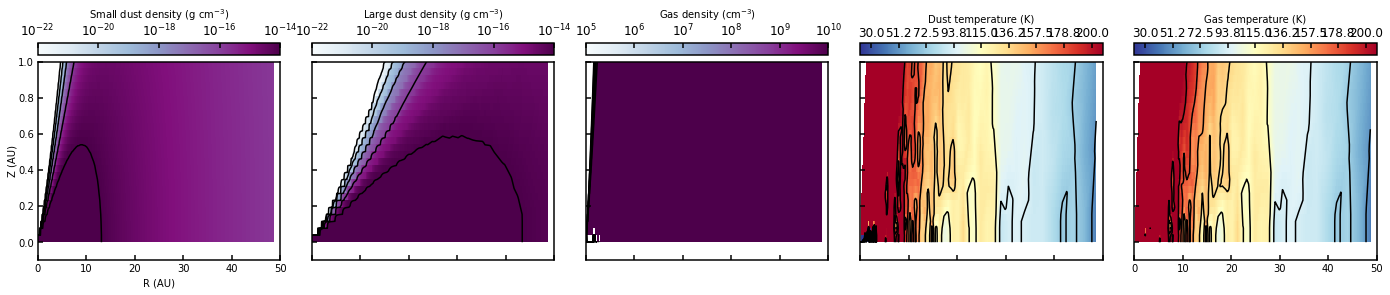

In [9]:
norm = setup(PATH=path, models=['bigdisk100'], 
             uv=True, run=True,
             disk_params={'r_in':0.1, 'r_out':50.0, 'r_peb':50.0, 'r_snow':0},
             grid_params={'ntheta':100, 
                          'nr':120, 
                          'n_in':0.05},
             star_params={'T_star':6000,
                          'L_star':100,
                          'L_uv_star':10**4},
             disk_type='herbig',
             nphot=10**6)
            ## nr = 100; ntheta=96

In [ ]:
def open_pickles(path):
    with open(os.path.join(path,'diskdata.pkl'), 'rb') as infile:
              diskinp = pickle.load(infile)
              ddustsm, ddustlg, tdustsm, tdustlg, dgas, tgas, re, ze = diskinp
    return ddustsm, ddustlg, tdustsm, tdustlg, dgas, tgas, re, ze

In [128]:
bigdisk = open_pickles('/Users/arcticfox/Documents/disks/models/bigdisk')
bigdisk100 = open_pickles('/Users/arcticfox/Documents/disks/models/bigdisk100')       

In [139]:
12000**4/6000**4

16.0

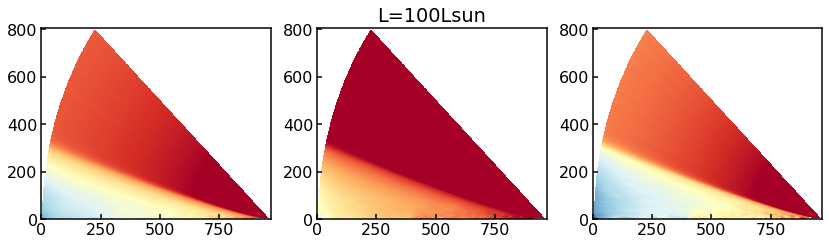

In [150]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14,6))

dat100 = np.rot90(bigdisk100[3]+bigdisk100[2],3)
tdust_ticks = np.linspace(30,500,9)
im = ax2.imshow(dat100, origin='lower',
           norm= mpl.colors.LogNorm(vmin=np.nanmin(tdust_ticks), 
                                    vmax=np.nanmax(tdust_ticks)),
           cmap='RdYlBu_r')
ax2.set_title('L=100Lsun')

dat = np.rot90(bigdisk[3]+bigdisk[2],3)
ax1.imshow(dat, origin='lower',
           norm= mpl.colors.LogNorm(vmin=np.nanmin(tdust_ticks), 
                                    vmax=np.nanmax(tdust_ticks)),
           cmap='RdYlBu_r')

ax3.imshow(dat100-dat, origin='lower',
           norm= mpl.colors.LogNorm(vmin=np.nanmin(tdust_ticks), 
                                    vmax=np.nanmax(tdust_ticks)),
           cmap='RdYlBu_r')

In [142]:
star100 = np.loadtxt('/Users/arcticfox/Documents/disks/models/bigdisk100/starspec.txt')
star = np.loadtxt('/Users/arcticfox/Documents/disks/models/bigdisk/starspec.txt')

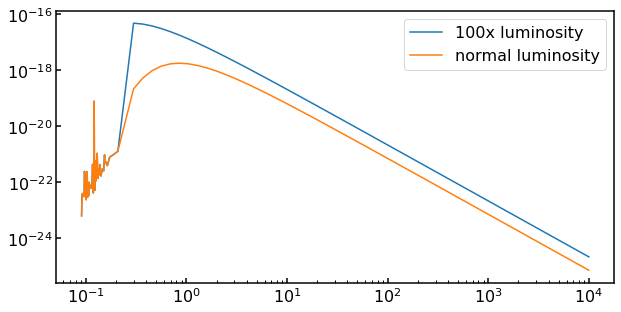

In [143]:
plt.figure(figsize=(10,5))
plt.plot(star100[0], star100[1], label='100x luminosity')
plt.plot(star[0],star[1], label='normal luminosity')
plt.legend()
plt.yscale('log')
plt.xscale('log')

In [140]:
((6000*3)/5777)**4

94.24982451232069